<a href="https://colab.research.google.com/github/Prajwayne/Classification-Problems-/blob/main/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

In this report the supervised learning technique used is Decision trees for classification problem. Objective here is to create a training set and apply decision tree algorithm and to predict which values falls into which category.
 In some cases, it’s difficult to draw lines and splitting the data using logistic regression as dataset gets complex, datasets cannot be split with just a single line, therefore splitting takes place with several lines. This is where Decision Trees come in action.



**Example to explain decision tree**


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

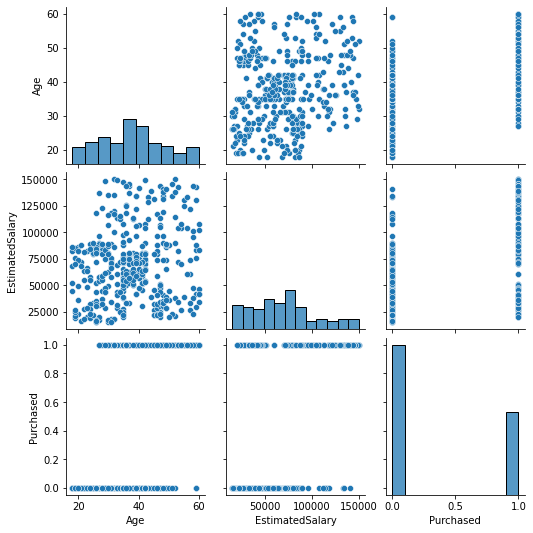

In [ ]:
sns.pairplot(dataset)

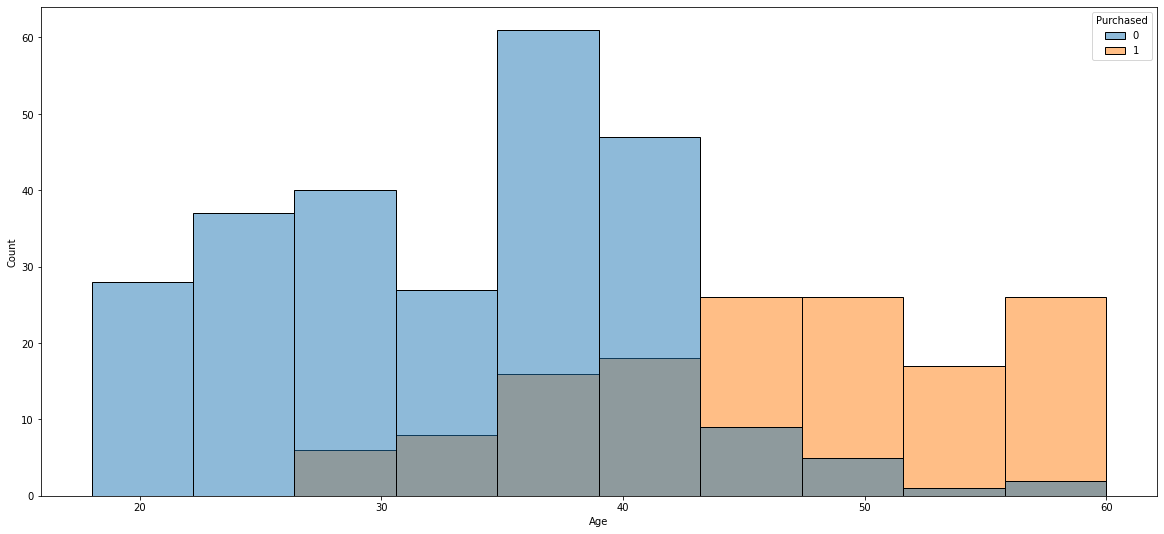

In [ ]:
plt.figure(figsize=[20,9])
sns.histplot(x='Age', hue='Purchased', data=dataset)

In [ ]:
import plotly.io as pio
import plotly.graph_objects as go
from plotly.figure_factory import create_distplot

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=dataset['Purchased'].value_counts().index, values=dataset['Purchased'].value_counts().values,
                     pull=[0.2, 0], textfont=dict(size=16)))

fig.update_layout(title="Target Variable Pie Plot",
                 annotations=[dict(text='Purchased', x=0.45, y=0.65, font_size=14, showarrow=True)])


fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot('Age', 'EstimatedSalary', dataset, hue='Purchased', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

Text(0.5, 1.0, 'Age')

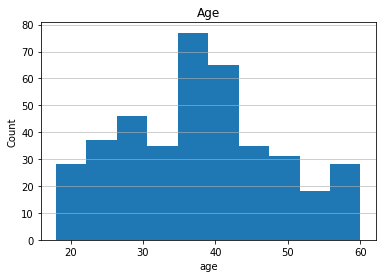

In [ ]:
plt.hist(dataset['Age'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Age')

Text(0.5, 1.0, 'Salary')

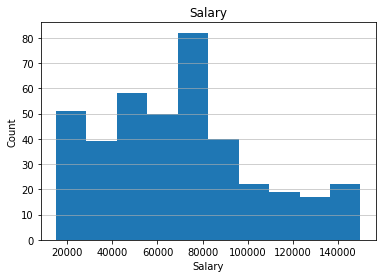

In [ ]:
plt.hist(dataset['EstimatedSalary'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary')

In [ ]:
dataset['EstimatedSalary'].mean()

69742.5

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)# split dataset into training and testing 

In [ ]:
from sklearn.preprocessing import StandardScaler # Since the age and salary have huge variations standard scalar sclaes the independent variables. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression # First model for comparison Logistic regression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)#model predciting on test set 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

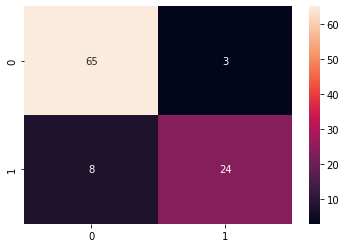

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



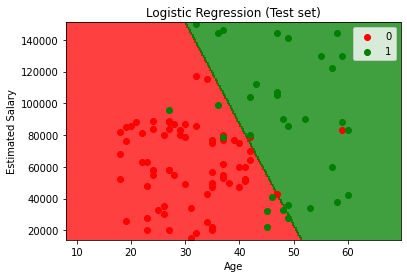

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifierdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifierdt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_preddt = classifierdt.predict(X_test)

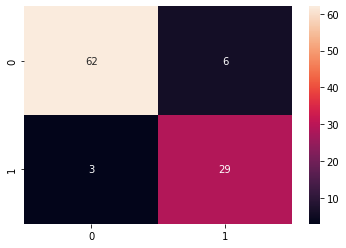

In [ ]:
cm = confusion_matrix(y_test, y_preddt)
sns.heatmap(cm, annot=True);


In [ ]:
print(classification_report(y_test,y_preddt))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



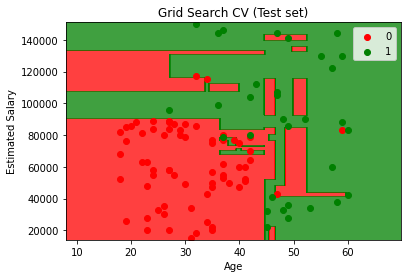

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifierdt.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Grid Search CV (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

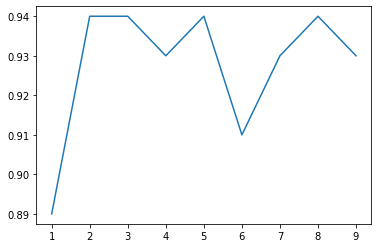

In [ ]:
# to check which value of maxdepth produces highest accuracy  
accuracy = []
for i in range(1,10):
  classifierdt = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
  classifierdt.fit(X_train, y_train)
  accuracy.append(classifierdt.score(X_test,y_test))

plt.plot(range(1,10), accuracy)



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('entropy', 'gini'), 'max_depth':[2]}

clf = GridSearchCV(classifierdt, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                              random_state=0),
             param_grid={'criterion': ('entropy', 'gini'), 'max_depth': [2]})

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [ ]:
clf.best_score_

0.9

In [ ]:
clf.cv_results_

## Predicting a new result

## Predicting the Test set results

In [ ]:
y_predgs = clf.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

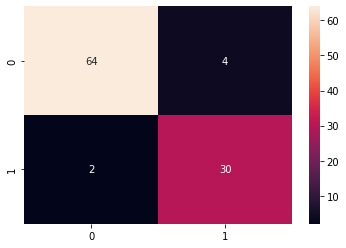

In [ ]:
cm = confusion_matrix(y_test, y_predgs)
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test,y_predgs))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predgs)
print(cm)
accuracy_score(y_test, y_predgs)

[[64  4]
 [ 2 30]]


0.94

## Visualising the Test set results

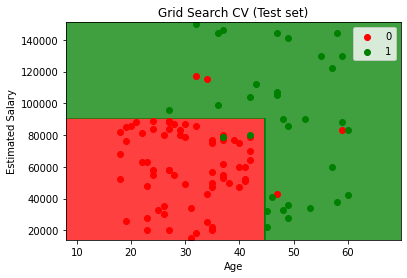

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Grid Search CV (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()